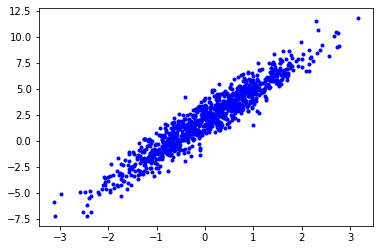

In [336]:
# https://www.tensorflow.org/guide/basic_training_loops

import tensorflow as tf
tf.debugging.set_log_device_placement(False)
# First, generate some data:

# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

# A vector of random x values
x = tf.random.normal(shape=[NUM_EXAMPLES])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = x * TRUE_W + TRUE_B + noise

# Plot all the data
import matplotlib.pyplot as plt

plt.scatter(x, y, c="b", marker='.')
plt.show()

Variables: (<tf.Variable 'b:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'W:0' shape=() dtype=float32, numpy=5.0>)


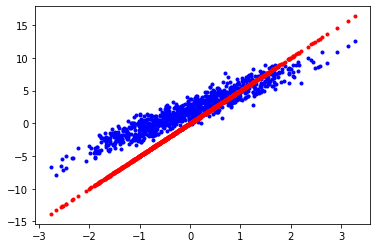

Current loss: 8.951489


In [165]:
# Define a model

class MyModel(tf.Module):
    
    def __init__(self, **kw):
        super().__init__(**kw)
        
        self.w = tf.Variable(5.0, name="W")
        self.b = tf.Variable(0.0, name="b")
        
    def __call__(self, inputs):
        return self.w * inputs + self.b # THIS IS THE ACTUAL MODEL

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

# Loss function. Compute mean-squared error of entire batch in one tensor
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))


plt.scatter(x, y, c="b", marker='.')
plt.scatter(x, model(x), c="r", marker='.')
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())
        

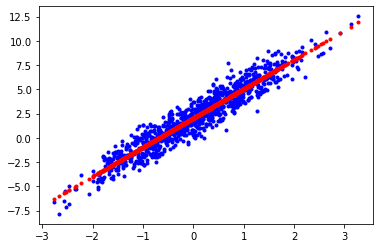

(<tf.Variable 'b:0' shape=() dtype=float32, numpy=2.031533>,
 <tf.Variable 'W:0' shape=() dtype=float32, numpy=3.0134277>)

In [251]:
# Define training step - simple gradient descent. Run this cell lots of times to see it learn

@tf.function
def train(model, x, y, learning_rate):
    
    with tf.GradientTape() as t:
        current_loss = loss(y, model(x))
        
    dw_dx, db_dx = t.gradient(current_loss, [model.w, model.b])
    
    model.w.assign_sub(learning_rate * dw_dx)
    model.b.assign_sub(learning_rate * db_dx)

train(model, x, y, 0.1)

plt.scatter(x, y, c="b", marker='.')
plt.scatter(x, model(x), c="r", marker='.')
plt.show()

model.variables


Starting: W=5.00 b=0.00, loss=8.95149


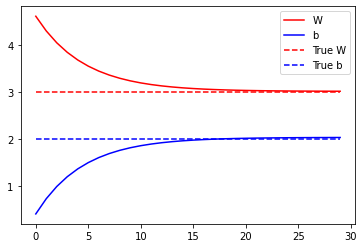

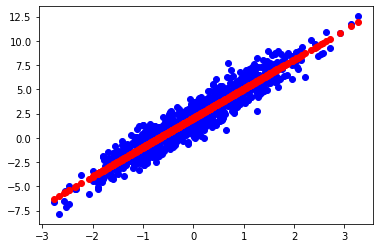

Ending: W=3.01 b=2.03, loss=0.96165


In [189]:
# Train a blank model from scratch

model = MyModel()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(30)

# Define a training loop
def training_loop(model, x, y):

    for epoch in epochs:
        # Update the model with the single giant batch
        train(model, x, y, learning_rate=0.1)

        # Track this before I update
        Ws.append(model.w.numpy())
        bs.append(model.b.numpy())
        current_loss = loss(y, model(x))

        #print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
        #      (epoch, Ws[-1], bs[-1], current_loss))
        
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

# Do the training
training_loop(model, x, y)

# Plot it
plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

# Visualize how the trained model performs
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Ending: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

In [337]:

# Start with a dataset of Tuples (tensor<scalar x>, tensor<scalar y>)
dataset = tf.data.Dataset.from_tensor_slices((x,y))

for d in dataset.take(5):
    print(d)

# Batch it so each step uses multiple data points. Also, the Keras optimizer and loss function can't cope with scalar dataset elements (https://www.tensorflow.org/api_docs/python/tf/data/Dataset#common_terms_2)

dataset = dataset.batch(100).cache()

#print(next(iter(dataset.take(1))))

(<tf.Tensor: shape=(), dtype=float32, numpy=0.38060448>, <tf.Tensor: shape=(), dtype=float32, numpy=3.7668788>)
(<tf.Tensor: shape=(), dtype=float32, numpy=0.8505762>, <tf.Tensor: shape=(), dtype=float32, numpy=5.6045794>)
(<tf.Tensor: shape=(), dtype=float32, numpy=-1.3710272>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.18628407>)
(<tf.Tensor: shape=(), dtype=float32, numpy=1.9302624>, <tf.Tensor: shape=(), dtype=float32, numpy=7.890626>)
(<tf.Tensor: shape=(), dtype=float32, numpy=-1.1867346>, <tf.Tensor: shape=(), dtype=float32, numpy=-1.827152>)


Epoch 1/20
10/10 [==============================] - 0s 1ms/step - loss: 8.3486
Epoch 2/20
10/10 [==============================] - 0s 1ms/step - loss: 5.9803
Epoch 3/20
10/10 [==============================] - 0s 1ms/step - loss: 4.3702
Epoch 4/20
10/10 [==============================] - 0s 1ms/step - loss: 3.2753
Epoch 5/20
10/10 [==============================] - 0s 1ms/step - loss: 2.5304
Epoch 6/20
10/10 [==============================] - 0s 1ms/step - loss: 2.0235
Epoch 7/20
10/10 [==============================] - 0s 1ms/step - loss: 1.6782
Epoch 8/20
10/10 [==============================] - 0s 1ms/step - loss: 1.4430
Epoch 9/20
10/10 [==============================] - 0s 1ms/step - loss: 1.2826
Epoch 10/20
10/10 [==============================] - 0s 1ms/step - loss: 1.1731
Epoch 11/20
10/10 [==============================] - 0s 1ms/step - loss: 1.0983
Epoch 12/20
10/10 [==============================] - 0s 1ms/step - loss: 1.0471
Epoch 13/20
10/10 [==============================

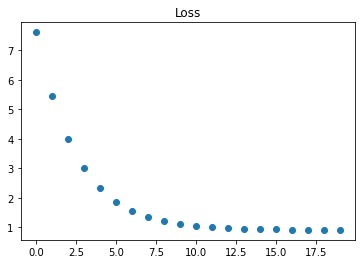

Ending: W=3.00 b=1.98, loss=0.90577


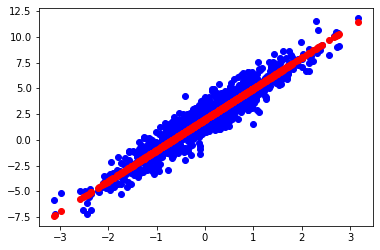

In [339]:
# Now with Keras


class MyKerasModel(tf.keras.Model):
    def __init__(self, **kw):
        super().__init__(**kw)
        
        self.w = tf.Variable(5.0, name="W")
        self.b = tf.Variable(0.0, name="b")
        
    def call(self, input):
        return self.w * input + self.b
    

keras_model = MyKerasModel()

keras_model.compile(
    run_eagerly=False,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.mean_squared_error,
)

h = keras_model.fit(dataset, epochs=20)

# Visualize how the trained model performs
plt.scatter(range(len(h.history['loss'])),h.history['loss'])
plt.title("Loss")
plt.show()
print("Ending: W=%1.2f b=%1.2f, loss=%2.5f" %
      (keras_model.w, keras_model.b, loss(y, keras_model(x))))


plt.scatter(x, y, c="b")
plt.scatter(x, keras_model(x), c="r")
plt.show()
